In [34]:
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

## Я решила выбрать распределение Рэлея. 
Распределение Рэлея — это распределение вероятностей случайной величины $${\displaystyle \displaystyle X}\displaystyle$$ X с плотностью

$${\displaystyle f(x;\sigma )={\frac {x}{\sigma ^{2}}}\exp \left(-{\frac {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0,\sigma >0,}{\displaystyle f(x;\sigma )={\frac {x}{\sigma ^{2}}}\exp \left(-{\frac {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0,\sigma >0,}$$
где $${\sigma }\$$  — параметр масштаба. Соответствующая функция распределения имеет вид

$${\displaystyle {\mathsf {P}}(X\leqslant x)=\int \limits _{0}^{x}f(\xi )\,d\xi =1-\exp \left(-{\frac {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0.}{\mathsf  P}(X\leqslant x)=\int \limits _{0}^{x}f(\xi )\,d\xi =1-\exp \left(-{\frac  {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0$$.
Введено впервые в 1880 г. Джоном Уильямом Стреттом (лордом Рэлеем) в связи с задачей сложения гармонических колебаний со случайными фазами.

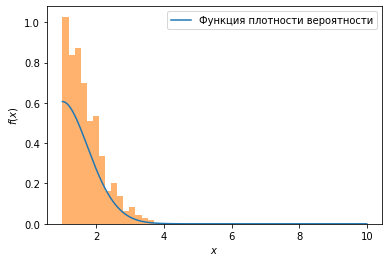

In [35]:
r = rayleigh()
sample = r.rvs(size=1000) #генерация 1000 значений распредления
x = np.linspace(1, 10, 1000) # массив точек для плотности 
pdf = r.pdf(x) # значения плотности распределения от выборки
#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label="Функция плотности вероятности")
plt.hist(sample, bins=50, range=(1, 10), density=True, alpha=0.6)
plt.ylabel("$f(x)$")
plt.xlabel('$x$')
plt.legend(loc='best')

Оценим распределения выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого возбмем 3 значения n (7, 21, 49), сгенерируем 1000 выборок объема n и построим гистограммы распредлений их выборочных средних.
Но для начала посчитаем среднее значение (мат. ожидание) и дисперсию.

Математическое ожидание  -	$$E = {\displaystyle {\sqrt {\frac {\pi }{2}}}\sigma } $$
Дисперсия  -	$$D = {\displaystyle \left(2-\pi /2\right){{\sigma }^{2}}}$$
$${\sigma }=1$$

In [41]:
scale = 1 #параметр масштаба
E = math.sqrt(math.pi/2*scale)
D = (2-math.pi/2)*scale**2
print('{} - среднее значение \n{} - дисперсия'.format(E, D))

1.2533141373155001 - среднее значение 
0.42920367320510344 - дисперсия


Теперь создадим функцию для генерации 100 выборок с разными n

In [37]:
from scipy.stats import norm
def get1000(n):
    samples = [rayleigh().rvs(n).mean() for i in range(1000)]
    mu, std = norm.fit(samples)
    plt.hist(samples, bins=25, density=True, alpha=0.6)
    # Риусем плотность
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 50)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'red', linewidth=2)
    title = 'Среднее значение = {}'.format(mu) + '\nОбъем выборки = {}'.format(n)
    plt.title(title)
    plt.ylabel("$f(x)$")
    plt.xlabel('$x$')
    plt.show()

Расчет выборок с разными n

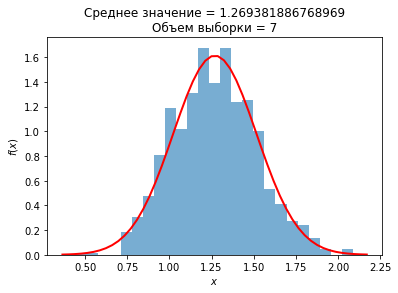

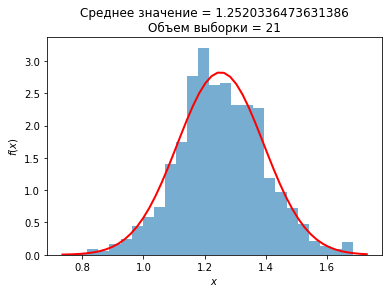

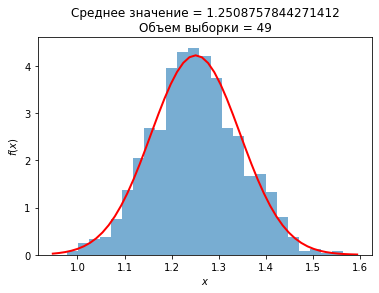

In [33]:
for n in [7, 21, 49]:
    get1000(n)

## Выводы
Значения средних с малых объемов выборок расчета значаний стали практически равными теоретическим значениям, что доказывает ЦПТ. Из этого можно сделать вывод, что объем выборки не важен.